In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

### Ontbijtgranen-broodbeleg-tussendoor

In [117]:
df = pd.read_csv("../TheOtherOption/data/ontbijtgranen-broodbeleg-tussendoor.csv")

In [118]:
df.head()

,allergy,id,brand,category,description,features,image_url,ingredients,nutrition,summary,unit_size,url
0,"['lactose', 'melk. Kan bevatten: glutenbevatte...",wi224876,Meester & Zn.,"Kaas, vleeswaren, tapas/Kipfilet (voorverpakt)",Meester & Zn. Kipfilet,['dah_kip'],https://static.ah.nl/static/product/AHI_435452...,"['81% kippenvlees', 'water', 'aardappelzetmeel...","{'Eiwitten': '17 g', 'Energie': '644 kJ (154 k...",Gebraden kipfilet is een mager product en zach...,150 g,https://www.ah.nl/producten/product/wi224876/m...
1,no_info,wi188709,AH,"Kaas, vleeswaren, tapas/Yorkham (versafdeling)",AH Yorkham,['beter_leven_1_ster'],https://static.ah.nl/static/product/AHI_435452...,['88% varkensvlees (Beter Leven keurmerk 1 ste...,"{'Eiwitten': '18 g', 'Energie': '545 kJ (130 k...",Een icoon bij Albert Heijn. Deze yorkham is za...,ca. 110 g,https://www.ah.nl/producten/product/wi188709/a...
2,['melk'],wi197226,De Zaanse Hoeve,"Ontbijtgranen, broodbeleg, tussendoor/Jonge ka...",De Zaanse Hoeve Jonge kaas 48+ plakken,"['weidemelk', 'free_from_gluten']",https://static.ah.nl/static/product/AHI_435452...,"['[b]melk[/b]*', 'zout', 'zuursel', 'stremsel....","{'Eiwitten': '23 g', 'Energie': '1465 kJ (355 ...",Jonge kaas[list][*][b]Smaak: [/b]Zacht\n[/list],400 g,https://www.ah.nl/producten/product/wi197226/d...
3,"['melk', 'lactose']",wi249,AH,"Ontbijtgranen, broodbeleg, tussendoor/Smeerkaas",AH Smeerkaas naturel,['free_from_gluten'],https://static.ah.nl/static/product/AHI_435452...,"['[b]melk[/b]', 'water', '[b]boter[/b]', '[b]w...","{'Eiwitten': '14 g', 'Energie': '1060 kJ (255 ...",Kaas van Nederlandse bodem. Volle smeerkaas na...,100 g,https://www.ah.nl/producten/product/wi249/ah-s...
4,"['glutenbevattende granen', 'haver. Kan bevatt...",wi48405,AH,"Ontbijtgranen, broodbeleg, tussendoor/Havermou...",AH Volkoren havermout,"['free_from_milk', 'free_from_lactose']",https://static.ah.nl/static/product/AHI_435452...,['volkoren[b]haver[/b]vlok'],"{'Eiwitten': '14 g', 'Energie': '1580 kJ (375 ...",Havermout,500 g,https://www.ah.nl/producten/product/wi48405/ah...


## Fill missing values

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   allergy      991 non-null    object
 1   id           991 non-null    object
 2   brand        990 non-null    object
 3   category     991 non-null    object
 4   description  991 non-null    object
 5   features     785 non-null    object
 6   image_url    990 non-null    object
 7   ingredients  991 non-null    object
 8   nutrition    991 non-null    object
 9   summary      942 non-null    object
 10  unit_size    991 non-null    object
 11  url          991 non-null    object
dtypes: object(12)
memory usage: 93.0+ KB


In [120]:
# Fill missing brands
df["brand"] = df["brand"].fillna('AH')

In [121]:
# Fill missing image_url
df[df["image_url"].isnull()]["url"]
df["image_url"] = df["image_url"].fillna('https://static.ah.nl/static/product/AHI_43545239363333303238_1_LowRes_JPG.JPG')

In [122]:
# Fill 'no info' in nutrition
df[df["nutrition"] == 'no info']["url"]

67     https://www.ah.nl/producten/product/wi367160/m...
88     https://www.ah.nl/producten/product/wi191606/m...
213    https://www.ah.nl/producten/product/wi493100/m...
278    https://www.ah.nl/producten/product/wi367164/m...
340    https://www.ah.nl/producten/product/wi106862/l...
473    https://www.ah.nl/producten/product/wi494056/a...
573    https://www.ah.nl/producten/product/wi367162/m...
787    https://www.ah.nl/producten/product/wi198046/a...
881    https://www.ah.nl/producten/product/wi439271/c...
915    https://www.ah.nl/producten/product/wi198150/s...
967    https://www.ah.nl/producten/product/wi123406/l...
978    https://www.ah.nl/producten/product/wi163847/a...
Name: url, dtype: object

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   allergy      991 non-null    object
 1   id           991 non-null    object
 2   brand        991 non-null    object
 3   category     991 non-null    object
 4   description  991 non-null    object
 5   features     785 non-null    object
 6   image_url    991 non-null    object
 7   ingredients  991 non-null    object
 8   nutrition    991 non-null    object
 9   summary      942 non-null    object
 10  unit_size    991 non-null    object
 11  url          991 non-null    object
dtypes: object(12)
memory usage: 93.0+ KB


## Visualize categories

In [124]:
df["category"].value_counts().head(10)

Snoep, koek, chips en chocolade/Fruitbiscuit & melkbiscuit    29
Kaas, vleeswaren, tapas/Jong belegen kaas (plakken)           27
Ontbijtgranen, broodbeleg, tussendoor/Hagelslag               25
Ontbijtgranen, broodbeleg, tussendoor/Smeerkaas               23
Bakkerij en banket/Ontbijtcrackers                            22
Soepen, sauzen, kruiden, olie/Kopsoep                         21
Ontbijtgranen, broodbeleg, tussendoor/Knackebrod              20
Ontbijtgranen, broodbeleg, tussendoor/Rijstwafels             18
Ontbijtgranen, broodbeleg, tussendoor/Roomkaas (kruiden)      18
Soepen, sauzen, kruiden, olie/Noedelsoep                      17
Name: category, dtype: int64

## Split nutritients

In [91]:
for key, row in df["nutrition"].items():
    try:
        nutr_dict = eval(row)
        df.loc[key, "Eiwitten"] = nutr_dict["Eiwitten"]
        df.loc[key, "Energie"] = nutr_dict["Energie"]
        df.loc[key, "Koolhydraten"] = nutr_dict["Koolhydraten"]
        df.loc[key, "Onverzadigde vetzuren"] = nutr_dict.get("Totaal onverzadigde vetzuren", 0)
        df.loc[key, "Vet"] = nutr_dict["Vet"]
        df.loc[key, "Voedingsvezel"] = nutr_dict.get("Voedingsvezel",0)
        df.loc[key, "Suikers"] = nutr_dict["Waarvan suikers"]
        df.loc[key, "Verzadigde vetzuren"] = nutr_dict["Waarvan verzadigd"]
        df.loc[key, "Zout"] = nutr_dict["Zout"]
    except:
        print(row)

0      {'Eiwitten': '17 g', 'Energie': '644 kJ (154 k...
1      {'Eiwitten': '18 g', 'Energie': '545 kJ (130 k...
2      {'Eiwitten': '23 g', 'Energie': '1465 kJ (355 ...
3      {'Eiwitten': '14 g', 'Energie': '1060 kJ (255 ...
4      {'Eiwitten': '14 g', 'Energie': '1580 kJ (375 ...
                             ...                        
986    {'Eiwitten': '7.5 g', 'Energie': '1795 kJ (430...
987    {'Calcium': '320 mg', 'Eiwitten': '12 g', 'Ene...
988    {'Eiwitten': '1.8 g', 'Energie': '905 kJ (215 ...
989    {'Eiwitten': '9 g', 'Energie': '1013 kJ (245 k...
990    {'Eiwitten': '17 g', 'Energie': '2655 kJ (640 ...
Name: nutrition, Length: 991, dtype: object


In [291]:
df_nutr = df.copy()
nutrients_list = []
for ind, row in df["nutrition"].items():
    try:
        nutr_dict = eval(row)
        for key in nutr_dict.keys():
            df_nutr.loc[ind, key] = nutr_dict[key]
            if not key in nutrients_list:
                nutrients_list.append(key)
    except:
        next

In [292]:
df_nutr.head()

,allergy,id,brand,category,description,features,image_url,ingredients,nutrition,summary,...,Vitamine B12 / Cyano-cobalamine,Betaglucanen,Waarvan polyolen,Omega 3 vetzuren,Waarvan zetmeel,Folaat,Vitamine H / Biotine,Vitamine C,Mangaan,Vitamine D3
0,"['lactose', 'melk. Kan bevatten: glutenbevatte...",wi224876,Meester & Zn.,"Kaas, vleeswaren, tapas/Kipfilet (voorverpakt)",Meester & Zn. Kipfilet,['dah_kip'],https://static.ah.nl/static/product/AHI_435452...,"['81% kippenvlees', 'water', 'aardappelzetmeel...","{'Eiwitten': '17 g', 'Energie': '644 kJ (154 k...",Gebraden kipfilet is een mager product en zach...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,no_info,wi188709,AH,"Kaas, vleeswaren, tapas/Yorkham (versafdeling)",AH Yorkham,['beter_leven_1_ster'],https://static.ah.nl/static/product/AHI_435452...,['88% varkensvlees (Beter Leven keurmerk 1 ste...,"{'Eiwitten': '18 g', 'Energie': '545 kJ (130 k...",Een icoon bij Albert Heijn. Deze yorkham is za...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,['melk'],wi197226,De Zaanse Hoeve,"Ontbijtgranen, broodbeleg, tussendoor/Jonge ka...",De Zaanse Hoeve Jonge kaas 48+ plakken,"['weidemelk', 'free_from_gluten']",https://static.ah.nl/static/product/AHI_435452...,"['[b]melk[/b]*', 'zout', 'zuursel', 'stremsel....","{'Eiwitten': '23 g', 'Energie': '1465 kJ (355 ...",Jonge kaas[list][*][b]Smaak: [/b]Zacht\n[/list],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"['melk', 'lactose']",wi249,AH,"Ontbijtgranen, broodbeleg, tussendoor/Smeerkaas",AH Smeerkaas naturel,['free_from_gluten'],https://static.ah.nl/static/product/AHI_435452...,"['[b]melk[/b]', 'water', '[b]boter[/b]', '[b]w...","{'Eiwitten': '14 g', 'Energie': '1060 kJ (255 ...",Kaas van Nederlandse bodem. Volle smeerkaas na...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"['glutenbevattende granen', 'haver. Kan bevatt...",wi48405,AH,"Ontbijtgranen, broodbeleg, tussendoor/Havermou...",AH Volkoren havermout,"['free_from_milk', 'free_from_lactose']",https://static.ah.nl/static/product/AHI_435452...,['volkoren[b]haver[/b]vlok'],"{'Eiwitten': '14 g', 'Energie': '1580 kJ (375 ...",Havermout,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Split nutrients columns into value and units

In [293]:
## Split energie in kcal en kJ
for ind, value in df_nutr["Energie"].items():
    try:
        kJ_pattern = r'([0-9]+) kJ'
        kcal_pattern = r'([0-9]+) kcal'
        kJ_val = int(re.findall(kJ_pattern, value)[0])
        kcal_val = int(re.findall(kcal_pattern, value)[0])
        df_nutr.loc[ind, "Energie_kJ_val"] = kJ_val
        df_nutr.loc[ind, "Energie_kJ_unit"] = 'kJ'
        df_nutr.loc[ind, "Energie_kcal_val"] = kcal_val
        df_nutr.loc[ind, "Energie_kcal_unit"] = 'kcal'
    except:
        df_nutr.loc[ind, "Energie_kcal_val"] = np.nan

In [294]:
nutrients_list.remove("Energie")
nutrients_list

['Eiwitten',
 'Koolhydraten',
 'Totaal onverzadigde vetzuren',
 'Vet',
 'Voedingsvezel',
 'Waarvan suikers',
 'Waarvan verzadigd',
 'Zout',
 'IJzer',
 'Magnesium',
 'Zink',
 'Calcium',
 'Natrium',
 'Waarvan enkelvoudig onverzadigd',
 'Waarvan meervoudig onverzadigd',
 'Kalium/Potassium',
 'Fosfor',
 'Vitamine B1 / Thiamine',
 'Vitamine B11 / Foliumzuur',
 'Vitamine B2 / Riboflavine',
 'Vitamine B3 / Niacine',
 'Vitamine B5 / Pantotheenzuur',
 'Vitamine B6 / Pyridoxine',
 'Vitamine E',
 'Vitamine D',
 'Jodium',
 'Vitamine B12 / Cyano-cobalamine',
 'Betaglucanen',
 'Waarvan polyolen',
 'Omega 3 vetzuren',
 'Waarvan zetmeel',
 'Folaat',
 'Vitamine H / Biotine',
 'Vitamine C',
 'Mangaan',
 'Vitamine D3']

In [319]:
for nutrient in nutrients_list:
    for ind, value in df_nutr[nutrient].items():
        try:
            pattern = r'([0-9]+.?[0-9]?) (\D+)'
            val = re.findall(pattern, value)[0][0]
            unit = re.findall(pattern, value)[0][1]
            df_nutr.loc[ind, f"{nutrient}_val"] = val
            df_nutr.loc[ind, f"{nutrient}_unit"] = unit
        except:
            if np.isnan(value):
                df_nutr.loc[ind, f"{nutrient}_val"] = np.nan
                df_nutr.loc[ind, f"{nutrient}_unit"] = np.nan
            else:
                df_nutr.loc[ind, f"{nutrient}_val"] = value
                df_nutr.loc[ind, f"{nutrient}_unit"] = 'check value'
    df_nutr[f"{nutrient}_val"] = pd.to_numeric(df_nutr[f"{nutrient}_val"])

<AxesSubplot:ylabel='Frequency'>

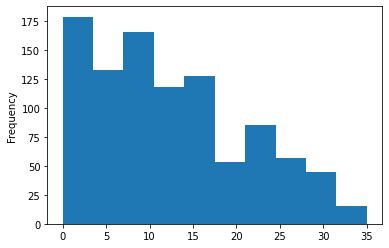

In [320]:
df_nutr["Eiwitten_val"].plot.hist()

In [328]:
top_20_eiwitten = df_nutr.sort_values("Eiwitten_val", ascending=False).head(20)

In [329]:
top_10_eiwitten_minst_vet = top_10_eiwitten.sort_values("Vet_val", ascending=True).head(10)

In [331]:
top_10_eiwitten_minst_vet[["description", "Eiwitten_val", "Vet_val"]]

,description,Eiwitten_val,Vet_val
526,Milner Slankie jong belegen 20+ plakken,31.0,12.0
31,AH Serranoham,32.0,12.0
674,AH Pan Pan 20+ plakken,34.0,13.0
800,AH Excellent Serrano ham,32.0,15.0
508,Beemster Belegen 30+ plakken,31.1,18.6
27,De Zaanse Hoeve Jong belegen 30+ plakken,31.0,19.0
763,AH Geitenkaas jong belegen 30+ plakken,33.0,19.0
940,AH Goudse belegen 30+ plakken,32.0,19.0
932,AH Goudse Belegen 30+ stuk,32.0,19.0
297,Beemster Oud 30+ plakken,33.1,19.8
